ストリーミング出力は最後の 5000 行に切り捨てられました。
Generation 5006, Best Fitness: -1179.5805851577607, Best Individual: [-33.09321844 -33.54980899]
Generation 5007, Best Fitness: -1179.5805851577607, Best Individual: [-32.99884648 -33.08786032]
Generation 5008, Best Fitness: -1169.3798020120526, Best Individual: [-33.19647651 -33.03046449]
Generation 5009, Best Fitness: -1169.3798020120526, Best Individual: [-33.00016604 -33.20564341]
Generation 5010, Best Fitness: -1169.3798020120526, Best Individual: [-33.09622713 -32.6329966 ]
Generation 5011, Best Fitness: -1174.0194706929917, Best Individual: [-33.26973508 -33.331063  ]
Generation 5012, Best Fitness: -1187.9661698350167, Best Individual: [-32.71982115 -33.13592397]
Generation 5013, Best Fitness: -1185.271646992155, Best Individual: [-33.15825684 -32.46688512]
Generation 5014, Best Fitness: -1176.9687649334617, Best Individual: [-33.27100904 -33.25631273]
Generation 5015, Best Fitness: -1190.1295680451744, Best Individual: [-33.20564341 -33.18640715]

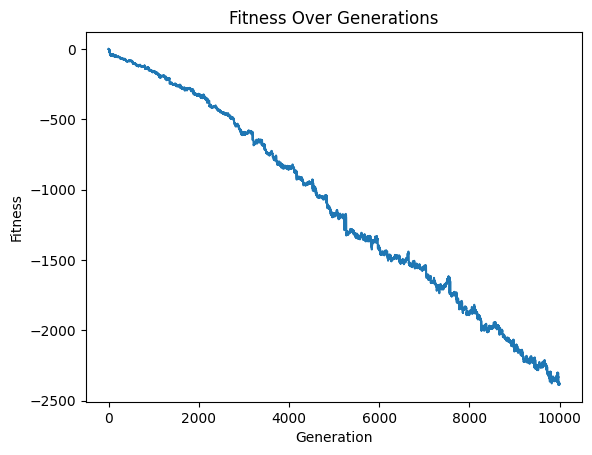

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 遺伝子の長さ
gene_length = 2

# 個体数
population_size = 100

# 世代数
generations = 10000

# 交叉率
crossover_rate = 0.3

# 突然変異率
mutation_rate = 0.1

# 適応度の推移を保存するリスト
fitness_history = []

# x の値を保存するリスト
x_values_history = []

# 適応度評価関数
def fitness(individual):
    x = individual[0]
    return -(x**2 - 4*x + 4)

# 初期集団の生成
population = np.random.uniform(low=-5.0, high=5.0, size=(population_size, gene_length))

# 進化開始
for generation in range(generations):
    # 適応度の計算
    fitness_values = np.apply_along_axis(fitness, axis=1, arr=population)

    fitness_history.append(np.max(fitness_values))

    x_values_history.append(population[np.argmax(fitness_values)])
    # 選択
    selection_prob = fitness_values / np.sum(fitness_values)
    selected_indices = np.random.choice(population_size, size=population_size, p=selection_prob)
    selected_population = population[selected_indices]

    # 交叉
    crossover_mask = (np.random.rand(population_size, gene_length) < crossover_rate)
    crossover_population = np.copy(selected_population)
    crossover_population[crossover_mask] = np.roll(crossover_population[crossover_mask], shift=1, axis=0)

    # 突然変異
    mutation_mask = (np.random.rand(population_size, gene_length) < mutation_rate)
    mutation_population = np.copy(crossover_population)
    mutation_population[mutation_mask] = mutation_population[mutation_mask] + np.random.normal(scale=0.1, size=np.sum(mutation_mask))

    # 適応度の再計算
    fitness_values = np.apply_along_axis(fitness, axis=1, arr=mutation_population)

    # 次世代の選択
    next_generation_indices = np.argsort(fitness_values)[::-1][:population_size]
    population = mutation_population[next_generation_indices]

    # 進化の途中結果の表示
    best_individual = population[np.argmax(fitness_values)]
    print(f"Generation {generation + 1}, Best Fitness: {np.max(fitness_values)}, Best Individual: {best_individual}")


# 最終的な結果の表示
final_fitness = np.max(fitness_values)
final_individual = population[np.argmax(fitness_values)]
final_x_value = x_values_history[-1]
print("\nFinal Result:")
print(f"Final Fitness: {final_fitness}")
print(f"Final Individual: {final_individual}")
print(f"Corresponding x Value: {final_x_value}")

# 適応度の推移を描画
plt.plot(fitness_history)
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()


In [ ]:
import numpy as np

# 適応度関数（最小化の場合）
def fitness_function(x):
    return x**2 - 4*x + 4 # y = x^2 - 4x + 4 x,y = 2,0

# 突然変異
def mutate(x):
    mutation_power = 0.1 #大きくしすぎると収束しなくなる
    return x + np.random.randn() * mutation_power

# 交叉（一点交叉）
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2


# ルーレット選択
def roulette_wheel_selection(population, fitness):
    selection_prob = fitness / np.sum(fitness)
    selected_indices = np.random.choice(len(population), size=len(population), p=selection_prob)
    return population[selected_indices]

# 遺伝的アルゴリズム
def genetic_algorithm(population_size, generations):
    # 初期値設定
    population = np.random.rand(population_size, 3) * 10 - 5  # 2次元の座標を持つ個体群
    best_solution = None
    best_fitness = np.inf

    for generation in range(generations):
        # 適応度の計算
        fitness = fitness_function(population[:, 0])

        # 最良解の更新
        min_fitness_index = np.argmin(fitness)
        if fitness[min_fitness_index] < best_fitness:
            best_fitness = fitness[min_fitness_index]
            best_solution = population[min_fitness_index]

        # ルーレット選択で次世代の個体群を生成
        selected_population = roulette_wheel_selection(population, fitness)
        print(best_solution,best_fitness)
        # 交叉と突然変異
        new_population = []
        for i in range(0, population_size, 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([child1, child2])

        population = np.array(new_population)

    return best_solution, best_fitness

# メインプログラム
population_size = 1000
generations = 1000
best_solution, best_fitness = genetic_algorithm(population_size, generations)

print("最良解:", best_solution)
print("最良適応度:", best_fitness)


[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789  4.25420166] 3.2097113916940145e-05
[ 2.00566543 -3.95274789

In [ ]:
#ニュートン法、大きく飛ぶと、収束しない。右に行ったり、左に動く。微分係数ゼロなどは、解けなくなる。シンプルな関数は、解を求めるなどはニュートン法のほうが速い
#遺伝的アルゴリズムは、突然変異、広く対応できる（局所最適に落ちにくい、逃れやすい）。キーワード（手法）、タブーサーチ、タブーリスト
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    """
    ニュートン法による根の計算　数学の手法で解いたほうが早い

    Parameters:
    - f: 解を求めたい関数
    - df: 関数の導関数
    - x0: 初期推定値
    - tol: 許容誤差
    - max_iter: 最大反復回数

    Returns:
    - x: 計算された根
    - iter_count: 反復回数
    """
    x = x0
    iter_count = 0

    while abs(f(x)) > tol and iter_count < max_iter:
        x = x - f(x) / df(x)
        iter_count += 1

    return x, iter_count

# 使用例
if __name__ == "__main__":
    # 解きたい方程式とその導関数を定義
    def f(x):
        return x**2 - 4*x + 4

    def df(x):
        return 2 * x - 4

    # ニュートン法を実行
    initial_guess = 1.0
    root, iterations = newton_method(f, df, initial_guess)

    # 結果を表示
    print(f"初期推定値: {initial_guess}")
    print(f"計算された根: {root}")
    print(f"反復回数: {iterations}")


初期推定値: 3.0
計算された根: 2.0009765625
反復回数: 10


In [ ]:
pip install tqdm